In [12]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob

In [2]:
train=pd.read_csv('datasets/train.csv').drop(['Unnamed: 0'],axis=1)
#fuzz=pd.read_csv('datasets/Fuzz_table.csv').drop(['Unnamed: 0'],axis=1)
#lev=pd.DataFrame(np.load('Features/lev.npy'))

In [3]:
print('\n\n'.join(train[train['Target']=='Appeal_to_Authority'].Sentence))

The next transmission could be more pronounced or stronger

when the plague comes again it starts from more stock , and the magnitude in the next transmission could be higher than the one that we saw

Franken ' s office said he has not " intentionally engage in " the " kind of conduct " described

As the political scientist Richard Neustadt said , political elites are constantly evaluating and re evaluating the president

Edward E . Curtis IV , the author of " Black Muslim Religion in the Nation of Islam , " said that while estimates ranged wildly about how many bona fide members belonged to the Nation , he believes that there were tens of thousands of members in the s and early s . But he said that millions of others sympathized with the movements anticolonial stance and were inspired by its most famous member , Muhammad Ali

I can tell you % this is not that kind of guy

Laura Loomer proves that authorities have directly lied to the American people

According to Loomer , she obtained

In [5]:
#lob = TextBlob('The next transmission could be more pronounced or stronger')
#Blobs=train['Sentence'].apply(lambda x : TextBlob(x))

In [5]:
print('\n\n'.join(train[train['Target']=='Thought-terminating_Cliches'].Sentence))

But wait , theres more

Im not a big conspiracy theory guy , but it dont sit right

We all have choices to make

just around the corner "

But whatever its flaws , Mysterium Fidei is the one I found , and Im convinced it wasnt an accident

As the days have become weeks , the weeks will become months , and survival will get more difficult

with an open heart and mind

Slowly but surely

They are a perfect match for each other

no government operation ever goes perfectly

So interesting

I ruined my life

But no plan is perfect

That question answers itself

thats about it , "

We are doing just fine ! "

We are doing just fine !

The time for " prudence " is long past

Indeed !

Sweden . That tells you everything

Thats crazy

There ' s no threat . "

got her wish

Thats my concern

who am I to judge "

think with your head . "

people . You have sucked their blood

No more games

I had no way to see into his mind

I had no way to see into his mind

I ' ve seen all kinds of people . The

In [8]:
focus=train[train['Target']=='Appeal_to_Authority']

In [15]:
blobs=focus['Sentence'].apply(lambda x : TextBlob(x))

In [18]:
blobs.apply(lambda x : x.wiki)

AttributeError: 'TextBlob' object has no attribute 'wiki'

Index(['ID', 'Span', 'Sentence', 'Target', 'Sentiment', 'Subjectivity', 'cap'], dtype='object')

In [342]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1,6),stop_words='english',analyzer='char',max_features=2750)
tfidf_w = TfidfVectorizer(sublinear_tf=True, min_df=1,ngram_range=(1,1),stop_words='english',analyzer='word',max_features=3000)
len_v= train['Span'].values.reshape(-1,1)
tfidf_v = tfidf.fit_transform(train.Sentence).toarray()
tfidf_wv = tfidf_w.fit_transform(train.Sentence).toarray()

In [494]:
assemble=lambda features : np.concatenate(features,axis=1)
features = assemble([tfidf_wv,len_v,tfidf_v,pca_fuzzy,pca_lev])
X_train, X_test, Y_train, Y_test = train_test_split(features,train['Target'],stratify=train['Target'],test_size=0.2,random_state=1234)

In [495]:
model_lr=LogisticRegression(penalty='l2', class_weight='balanced', solver="liblinear", max_iter=400)
model_lr.fit(X_train,Y_train)
pred_lr=model_lr.predict(X_test)

/home/somesh/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


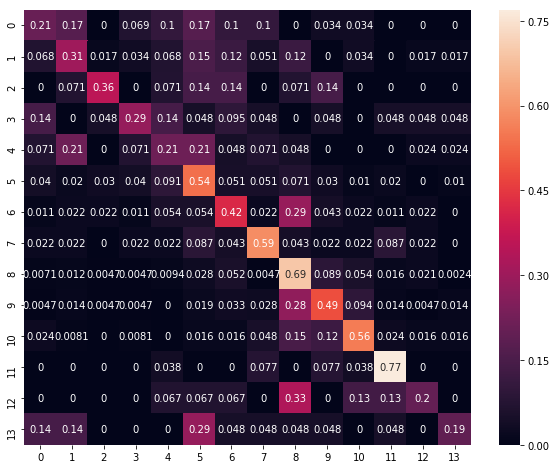

In [496]:
cm=confusion_matrix(Y_test,pred_lr)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot=True)

In [497]:
cf_rep=classification_report(Y_test,pred_lr)
print(cf_rep)
sum([float(rep.split()[3]) for rep in cf_rep.split('\n')[2:16]])/14

                                    precision    recall  f1-score   support

               Appeal_to_Authority       0.19      0.21      0.20        29
          Appeal_to_fear-prejudice       0.36      0.31      0.33        59
    Bandwagon,Reductio_ad_hitlerum       0.33      0.36      0.34        14
           Black-and-White_Fallacy       0.26      0.29      0.27        21
         Causal_Oversimplification       0.22      0.21      0.22        42
                             Doubt       0.47      0.54      0.50        99
         Exaggeration,Minimisation       0.41      0.42      0.41        93
                       Flag-Waving       0.44      0.59      0.50        46
                   Loaded_Language       0.70      0.69      0.69       425
             Name_Calling,Labeling       0.60      0.49      0.54       212
                        Repetition       0.57      0.56      0.56       124
                           Slogans       0.45      0.77      0.57        26
       Thou

0.3950000000000001

In [528]:
max(train['Sentence'].str.split(' ').apply(lambda x : len(x)+1))

158

(6129, 4180)

In [ ]:
for thresh in range(75,100,5):
    train['rep']=(fuzz.values>thresh).sum(axis=1)
    train.groupby('Target')['rep'].describe()
    plt.figure(figsize=(18,9))
    sns.boxplot(x='Target',y='rep',data=train[train['rep']>0])

In [474]:
fuzzy_values=fuzz.values
fuzzy_values.sort(axis=1)

In [475]:
fuzzy_values

array([[  3,   3,   3, ..., 100, 100, 100],
       [  3,   3,   3, ..., 100, 100, 100],
       [  0,   0,   0, ...,  67, 100, 100],
       ...,
       [  6,   6,   7, ...,  52,  52, 100],
       [  6,   6,   6, ...,  64, 100, 100],
       [  0,   0,   0, ..., 100, 100, 100]])

In [476]:
lev_values=lev.values
lev_values.sort(axis=1)

In [498]:
lev['Target']=train['Target']

In [502]:
lev.groupby('Target').mean()

,0,1,2,3,4,5,6,7,8,9,...,6119,6120,6121,6122,6123,6124,6125,6126,6127,6128
Target,,,,,,,,,,,,,,,,,,,,,
Appeal_to_Authority,0.000000,0.000000,0.013889,0.020833,0.027778,0.041667,0.069444,0.138889,0.166667,0.187500,...,46.166667,46.375000,46.708333,47.055556,47.465278,48.013889,48.986111,50.972222,56.881944,100.0
Appeal_to_fear-prejudice,0.003401,0.017007,0.020408,0.034014,0.040816,0.054422,0.071429,0.102041,0.129252,0.159864,...,47.302721,47.646259,47.969388,48.275510,49.153061,49.789116,50.595238,52.102041,59.030612,100.0
"Bandwagon,Reductio_ad_hitlerum",0.013889,0.055556,0.097222,0.097222,0.125000,0.152778,0.152778,0.152778,0.305556,0.347222,...,46.888889,47.166667,47.583333,48.055556,48.472222,49.138889,49.875000,54.444444,61.500000,100.0
Black-and-White_Fallacy,0.046729,0.084112,0.121495,0.177570,0.196262,0.205607,0.205607,0.299065,0.308411,0.411215,...,46.757009,46.915888,47.149533,47.514019,48.971963,49.719626,50.289720,51.121495,58.009346,100.0
Causal_Oversimplification,0.014354,0.028708,0.033493,0.038278,0.043062,0.076555,0.086124,0.133971,0.181818,0.210526,...,46.258373,46.406699,46.626794,46.837321,47.110048,47.449761,47.976077,49.688995,54.392344,100.0
Doubt,0.004057,0.016227,0.016227,0.026369,0.034483,0.048682,0.064909,0.093306,0.123732,0.164300,...,46.180527,46.444219,46.671400,46.908722,47.235294,47.640974,48.225152,49.261663,53.616633,100.0
"Exaggeration,Minimisation",0.000000,0.008584,0.023605,0.023605,0.027897,0.032189,0.036481,0.057940,0.068670,0.085837,...,51.152361,51.620172,52.143777,52.817597,53.658798,54.652361,56.036481,59.165236,67.594421,100.0
Flag-Waving,0.000000,0.000000,0.004367,0.013100,0.065502,0.087336,0.113537,0.253275,0.288210,0.406114,...,56.777293,57.733624,58.449782,59.270742,60.336245,61.340611,63.056769,65.947598,73.576419,100.0
Loaded_Language,0.000000,0.001884,0.002355,0.003768,0.005181,0.008950,0.010363,0.015544,0.017428,0.021667,...,53.473858,54.150730,54.792275,55.655205,56.923693,58.457843,60.389543,63.700424,70.700424,100.0


In [478]:
pca_f=PCA(n_components=10)
pca_l=PCA(n_components=10)
pca_r=PCA(n_components=10)
pca_fuzzy=pca_f.fit_transform(fuzzy_values)
pca_lev=pca_l.fit_transform(lev_values)
pca_result=pca_r.fit_transform(np.concatenate([fuzzy_values,lev_values],axis=1))

In [479]:
print(sum(pca_f.explained_variance_ratio_))
print(sum(pca_l.explained_variance_ratio_))
print(sum(pca_r.explained_variance_ratio_))

0.9900038233708784
0.9942929609194551
0.987476675226708


In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 8})
RS = 1234
import matplotlib.patheffects as PathEffects

In [ ]:
import time
time_start = time.time()

fashion_pca_tsne_r = TSNE(random_state=RS).fit_transform(pca_result)
fashion_pca_tsne_l = TSNE(random_state=RS).fit_transform(pca_lev)
fashion_pca_tsne_f = TSNE(random_state=RS).fit_transform(pca_fuzzy)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
y=label_encoder.fit_transform(train.Target)

In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors,figsize=(8,8)):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=figsize)
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=20)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
fashion_scatter(fashion_pca_tsne_f, y,figsize=(10,10))

In [ ]:
fashion_scatter(fashion_pca_tsne_l, y,figsize=(10,10))

In [ ]:
fashion_scatter(fashion_pca_tsne_r, y,figsize=(10,10))

In [ ]:
for a,b in enumerate(label_encoder.inverse_transform([i for i in range(14)])):
    print(a,b)

In [ ]:
y_new=y.copy()
d={
    0 : 0,
    1 : 1,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 3,
    7 : 2,
    8 : 4,
    9 : 0,
    10 : 5,
    11 : 0,
    12 : 0,
    13 : 0
}
for k, v in d.items():
    y_new[y_new==k] = v

In [515]:
s='0.00000	0.16327	0.44444	0.14634	0.35897	0.43137	0.37500	0.69318	0.67568	0.55524	0.25571	0.26471	0.10811	0.04878'
p_me=[float(x) for x in s.split('\t')]

In [516]:
sum(p_me)/14

0.32291428571428565

In [525]:
s='0.06667	0.21333	0.44444	0.07143	0.17143	0.51613	0.43636	0.73034	0.69761	0.59898	0.27193	0.27119	0.00000	0.08000'
p_x=[float(x) for x in s.split('\t')]

In [526]:
sum(p_x)/14

0.32641714285714285